In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sp
import pyCoDaMath as coda
from pycodamath import extra
import scipy.optimize as optimization

ModuleNotFoundError: No module named 'pyCoDaMath'

#### 1. Data Loading

In [37]:
data = pd.read_csv('../data/2-meteorites.csv', sep=',')
print(data.shape)

(12, 10)


#### 2. Visulisation

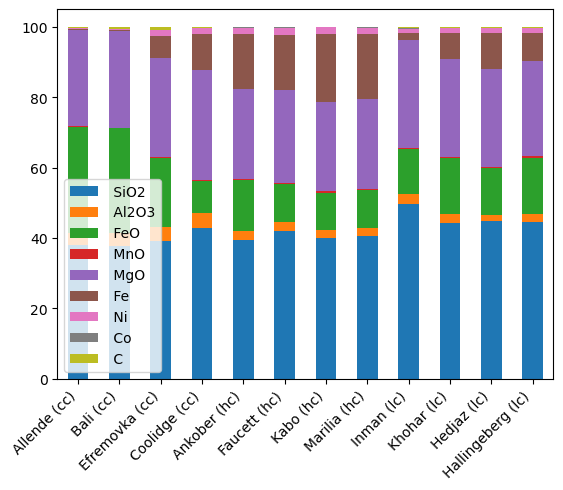

In [38]:
#apply coda closure
data.iloc[:,1:] = data.iloc[:,1:].coda.closure(100)

# Plot
ax = data.plot.bar(stacked=True)

# Set x-axis tick labels
ax.set_xticks(range(len(data.iloc[:,0])))
ax.set_xticklabels(data.iloc[:,0], rotation=45, ha='right')  # Rotate if needed
plt.savefig('../handin/figures/stacked_bar.png', dpi=300, bbox_inches='tight')
plt.show()



we see that there is an obvious difference in the compositions of the meteorise fromt the 12 different origins
How obivius the cc/hc/ic groups overall effect on the compositions is not obious from this plot

#### 2.1 PCA

We have to first need to calculate the geometric means for each row of the closed data
$$
\mathbf{g} = (g_1, g_2, \dots, g_D), \quad \text{where} \quad g_j = \left( \prod_{i=1}^n x_{ij} \right)^{1/n}
$$

In [39]:
# geometroc mean
gm = data.iloc[:,1:].coda.gmean()
print(f'Geometric means: {gm}')

Geometric means: [44.60105128  2.99371922 15.88534298  0.33653189 29.3132322   5.24926886
  1.32076111  0.05588466  0.24420781]


Variantion matrix

$$
t_{jk} = \frac{1}{n} \sum_{i=1}^n \left( \ln \frac{x_{ij}}{x_{ik}} - m_{jk} \right)^2
$$
$$
m_{jk} = \frac{1}{n} \sum_{i=1}^n \ln \frac{x_{ij}}{x_{ik}}
$$
Total varaince: 
$$
\text{TotVar}[T] = \frac{1}{2D} \sum_{i,j=1}^D t_{ij}
$$

In [40]:
# Total variance
tot_var = data.iloc[:,1:].coda.totvar()
print(f'Total variance: {tot_var}')

Total variance: 4.257705090451211


Pertube the data by inverse of gm which
$$ data ⊕ gm$$
$$ data * \frac{1}{gm}$$
This equvilant to centereing the non compositional data.

In [41]:
data_centered = data.iloc[:,1:].coda.center()

AttributeError: 'Biplot' object has no attribute 'adjustloadinglabels'

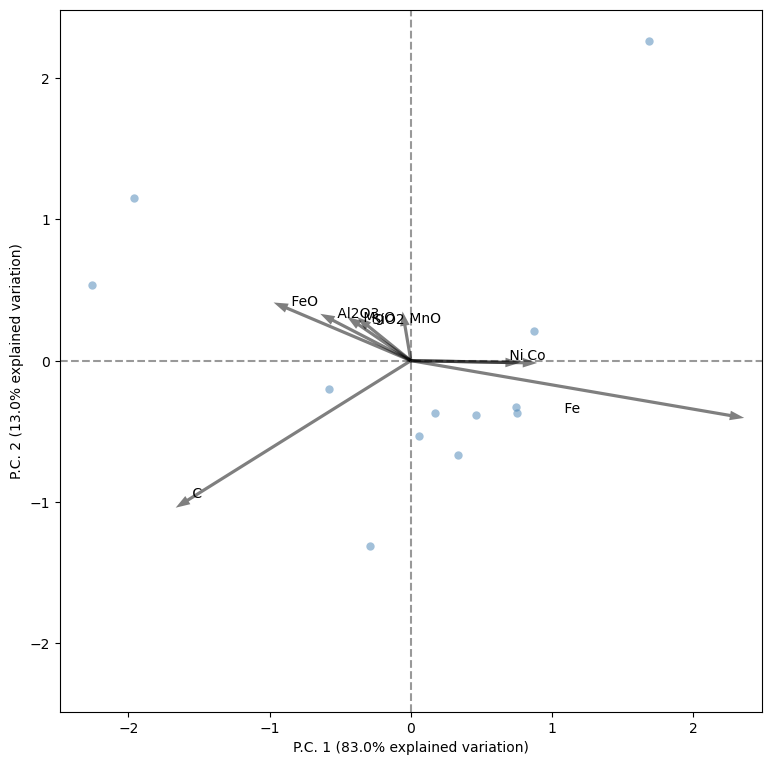

In [42]:
mypca = coda.pca.Biplot(data_centered)
mypca.adjustloadinglabels()

In [52]:
dir(mypca)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'axis',
 'displaylegend',
 'geomobj',
 'labeloutliers',
 'loadings',
 'patches',
 'plotcentroids',
 'plotcontours',
 'plotellipses',
 'plothulls',
 'plotloadinglabels',
 'plotloadings',
 'plotscorelabels',
 'plotscores',
 'removecontours',
 'removelabels',
 'removepatches',
 'removescores',
 'scores']

AttributeError: 'Biplot' object has no attribute 'adjustloadinglabels'

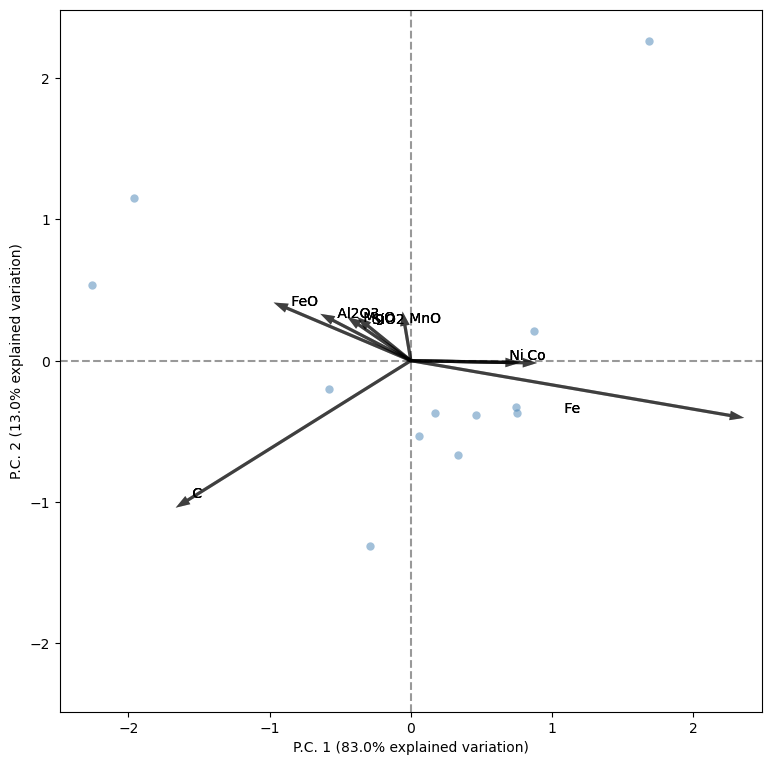

In [57]:
mypca = coda.pca.Biplot(data_centered)
mypca.plotloadings()
mypca.plotloadinglabels()
mypca.adjustloadinglabels()


In [56]:
import inspect
from pycodamath.pca import Biplot

print(inspect.getsource(Biplot))


class Biplot():
    ''' A class to create and a PCA biplot '''

    def __init__(self, data, axis=None, default=True):
        if axis is None:
            _, self.axis = plt.subplots(figsize=(7.8, 7.8))
        else:
            self.axis = axis
        self.axis.set(adjustable='box', aspect='equal')
        self.scores, eig_val, self.loadings = _svd(
            data.coda.center().coda.scale().coda.clr())
        scales = [np.max(np.abs(self.loadings.values)),
                  [np.max(np.abs(self.scores.loc[idx].values)) for idx in ['pc1', 'pc2']]]

        self.axis.set_xlabel(
            f'P.C. 1 ({np.round(eig_val[0]**2 / np.sum(eig_val**2)*100):.1f}% explained variation)')
        self.axis.set_ylabel(
            f'P.C. 2 ({np.round(eig_val[1]**2 / np.sum(eig_val**2)*100):.1f}% explained variation)')
        self.axis.set_xlim(-scales[0]*1.1, scales[0]*1.1)
        self.axis.set_ylim(-scales[0]*1.1, scales[0]*1.1)
        self.axis.plot([self.axis.get_xlim()[0], self.axis.get_